In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from IPython.display import Latex

from IPython.display import HTML 

In [424]:
def cv_show(img, name):
    if (len(img) > 1) and (len(img) < 20):
        img = np.hstack( img )
    cv2.imshow(name, img[0])
    cv2.waitKey(0)  #0表示任意键，其他数字表示等待ms数
    cv2.destroyAllWindows()
    

#图片按RGB重组
def reSort2RGB(img):
    b,g,r=cv2.split(img)
    return cv2.merge([r,g,b])


#图像转置
def transposePic(img):
    img1 = np.zeros( (img.shape[1], img.shape[0], img.shape[2] ) )
    for i in range(0, 2):
        for x in range(0, img.shape[0]):
            for y in range(0, img.shape[1]):
                img1[y][x][i] = img[x][y][i]
    return img1 



#绘图pic
def plt_showRGB( img,  size, title, s=True ):
    if isinstance(img,tuple) and (len(img) > 1):
        img = np.hstack( img )  #横向拼接
    img = reSort2RGB(img)       #按RGB重组
    if s:
        plt.figure(figsize=size) 
        plt.axis('off')
    plt.imshow(img),  plt.title(title)
    
def plt_showGray( img,  size, title, s=True ):
    if isinstance(img,tuple) and (len(img) > 1):
        img = np.hstack( img )  #横向拼接
    if s:
        plt.figure(figsize=size) 
        plt.axis('off')
    plt.imshow(img, 'gray'),  plt.title(title)
    
    
def plt_subplot( img, size, num, title ):
    plt.figure(figsize=size)
    for i in range( 1, len(img)+1 ):
        plt.subplot(num*10 + i)
        if len(img[i-1].shape) == 3:
            plt_showRGB( img[i-1],  size,  title[i-1], s=False )
        else:
            plt_showGray( img[i-1],  size,  title[i-1], s=False )
            
            
#自定义方法：根据图片画直方图
def plotHist(img):
    plt_subplot( (img, ), (13, 5), 12, ('img',) )
    plt.subplot(122)
    if (len(img.shape)==3) and (img.shape[2]==3):  #彩图
        for i,v in {0:'b', 1:'g', 2:'r'}.items():
            hist = cv2.calcHist([img], [i], None, [256], [0,256]) 
            plt.plot(hist, v),  plt.title('hist')
    elif len(img.shape)==2:                        #灰度图
        hist = cv2.calcHist([img], [0], None, [256], [0,256]) 
        plt.plot(hist, 'b'),  plt.title('hist')
    plt.xlim([0,256]),  plt.show()

- **ravel()、flatten()、squeeze()都有将多维数组转换为一维数组的功能。**

In [3]:
img = cv2.imread('cat.jpg')

In [4]:
img.ravel()

array([142, 151, 160, ..., 129, 142, 144], dtype=uint8)

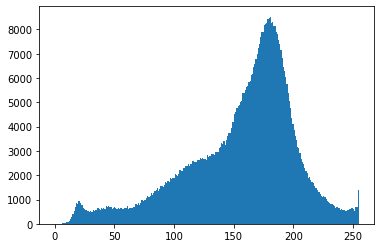

In [5]:
plt.hist(img.ravel(), 256)
plt.show()

## 计算直方图
统计每阶像素点有多少个。 
(0, 255)  共256阶

- **hist	=	cv.calcHist(	images, channels, mask, histSize, ranges  [, hist[, accumulate]]	)**


In [159]:
img = cv2.imread('cat.jpg')
hist = cv2.calcHist( [img], [0], None, [256], [0, 255] )

In [160]:
hist.shape

(256, 1)

In [161]:
np.sum(hist)

206923.0

In [162]:
np.max(hist)

2885.0

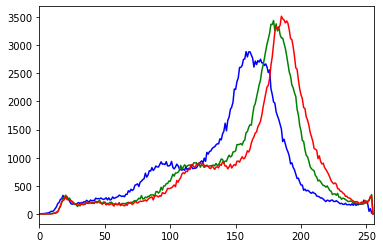

In [163]:
#画出各通道的直方图
plt.xlim((0,256))
hist_B = cv2.calcHist( [img], [0], None, [256], [0, 255] )
plt.plot(hist_B, 'b')
hist_G = cv2.calcHist( [img], [1], None, [256], [0, 255] )
plt.plot(hist_G, 'g')
hist_R = cv2.calcHist( [img], [2], None, [256], [0, 255] )
plt.plot(hist_R, 'r')

### mask操作

In [23]:
img.shape       #一行三列

(414, 500, 3)

In [24]:
img.shape[:2]   #取一行两列

(414, 500)

In [26]:
arr = np.zeros(img.shape[:2], np.uint8)

In [28]:
arr.shape

(414, 500)

In [30]:
arr[100:300, 100:400] = 255
mask = arr

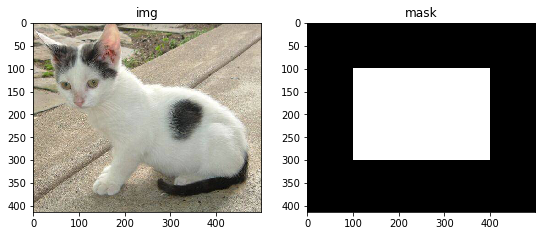

In [37]:
plt_subplot( (img,mask), (9, 5), 12, ('img','mask') )

### 与操作
- **dst	=	cv.bitwise_and(	src1, src2[, dst[, mask]]	)**


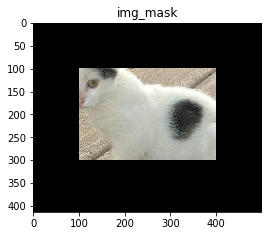

In [103]:
img_mask = cv2.bitwise_and( img, img, mask=mask )
plt_subplot( (img_mask,), (9, 5), 12, ('img_mask',) )


In [70]:
(rows, cols, channel) = img.shape

In [71]:
rows

414

In [138]:
# 创在一个三维数组
arr3 = np.arange(1, 61).reshape(4,5,3)
arr3

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]],

       [[16, 17, 18],
        [19, 20, 21],
        [22, 23, 24],
        [25, 26, 27],
        [28, 29, 30]],

       [[31, 32, 33],
        [34, 35, 36],
        [37, 38, 39],
        [40, 41, 42],
        [43, 44, 45]],

       [[46, 47, 48],
        [49, 50, 51],
        [52, 53, 54],
        [55, 56, 57],
        [58, 59, 60]]])

In [142]:
b,g,r = cv2.split(arr3)

In [143]:
b

array([[ 1,  4,  7, 10, 13],
       [16, 19, 22, 25, 28],
       [31, 34, 37, 40, 43],
       [46, 49, 52, 55, 58]], dtype=int32)

#### b,g,r = cv2.split( img ) 的原理

In [144]:
arr3[:, :, 0]

array([[ 1,  4,  7, 10, 13],
       [16, 19, 22, 25, 28],
       [31, 34, 37, 40, 43],
       [46, 49, 52, 55, 58]])

#### cv2.bitwise_and()  图像按位与的原理

In [78]:
b,g,r = cv2.split(img)

In [79]:
b.shape

(414, 500)

In [83]:
b[100:300, 100:400]

array([[187, 185, 186, ..., 145, 141, 121],
       [186, 184, 185, ..., 141, 142, 130],
       [185, 183, 183, ..., 135, 141, 138],
       ...,
       [129, 149, 152, ..., 176, 173, 170],
       [132, 120, 132, ..., 174, 171, 169],
       [141, 149, 147, ..., 172, 170, 169]], dtype=uint8)

In [93]:
b_mask = b & mask
g_mask = g & mask
r_mask = r & mask

In [145]:
b_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [94]:
b_mask[100:300, 100:400]

array([[187, 185, 186, ..., 145, 141, 121],
       [186, 184, 185, ..., 141, 142, 130],
       [185, 183, 183, ..., 135, 141, 138],
       ...,
       [129, 149, 152, ..., 176, 173, 170],
       [132, 120, 132, ..., 174, 171, 169],
       [141, 149, 147, ..., 172, 170, 169]], dtype=uint8)

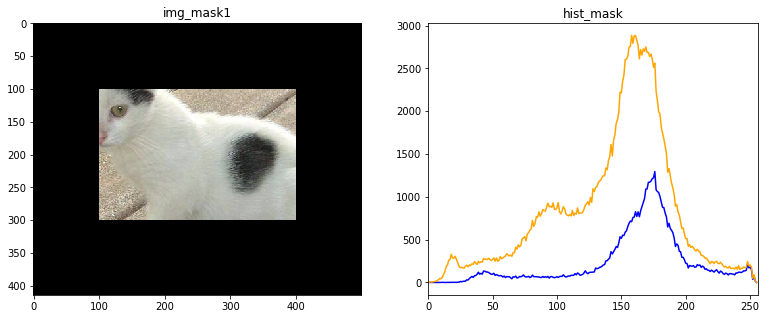

((0, 256), None)

In [167]:
img_mask1 = cv2.merge( (b_mask, g_mask, r_mask) )           #遮上蒙版的图片
hist_mask = cv2.calcHist([img], [0], mask, [256], [0,255])  #计算有蒙版直方图

plt_subplot( (img_mask1, ), (13, 5), 12, ('img_mask1',) )
plt.subplot(122), plt.plot(hist_mask, 'b'), plt.plot(hist, 'orange'), plt.title('hist_mask')  
plt.xlim([0,256]), plt.show()   # hist_mask(蓝色)是小图直方图，hist(橘黄色)是大图直方图。

## 直方图均衡化原理

![Jupyter](./bala.jpg)

- **首先我们将256个色阶分成4个段**

In [168]:
256/4

64.0

- **那就分成：50、128、200、255**

In [253]:
img = cv2.imread('cat.jpg', 0)

In [254]:
img.shape

(414, 500)

In [255]:
img.size

207000

In [256]:
img.dtype

dtype('uint8')

#### 第一阶段： <= 50

In [258]:
xArr,yArr = np.where(img <= 50)

In [259]:
len(xArr)/img.size

0.036217391304347826

In [260]:
np.int( (len(xArr)/img.size) * 255 )

9

In [261]:
for pt in zip(xArr, yArr):    #zip是将两个独立的数组组成一个一个的点
    img[pt[0]][pt[1]] = 9

#### 第二阶段 <= 128

In [262]:
xArr,yArr = np.where(img <= 128)

In [263]:
len(xArr)/img.size

0.21937198067632852

In [264]:
np.int( (len(xArr)/img.size) * 255 )

55

In [265]:
xArr,yArr = np.where((img > 50)&(img <= 128))
for pt in zip(xArr, yArr):    #zip是将两个独立的数组组成一个一个的点
    img[pt[0]][pt[1]] = 58

#### 第三阶段 <= 200

In [266]:
xArr,yArr = np.where(img <= 200)

In [267]:
len(xArr)/img.size

0.8799806763285024

In [268]:
np.int( (len(xArr)/img.size) * 255 )

224

In [269]:
xArr,yArr = np.where((img > 128)&(img <= 200))
for pt in zip(xArr, yArr):    #zip是将两个独立的数组组成一个一个的点
    img[pt[0]][pt[1]] = 224

#### 第三阶段 <= 255

In [270]:
xArr,yArr = np.where(img > 200)
for pt in zip(xArr, yArr):    #zip是将两个独立的数组组成一个一个的点
    img[pt[0]][pt[1]] = 255

- #### 最后来看均衡化后的图像

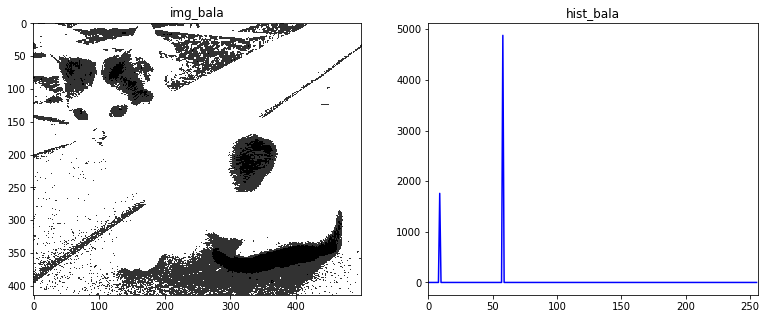

((0, 256), None)

In [271]:
hist_bala = cv2.calcHist([img], [0], mask, [256], [0,255])  #计算有蒙版直方图

plt_subplot( (img, ), (13, 5), 12, ('img_bala',) )
plt.subplot(122),  plt.plot(hist_bala, 'b'),  plt.title('hist_bala')  
plt.xlim([0,256]), plt.show()   

### 自定义直方图均衡化方法

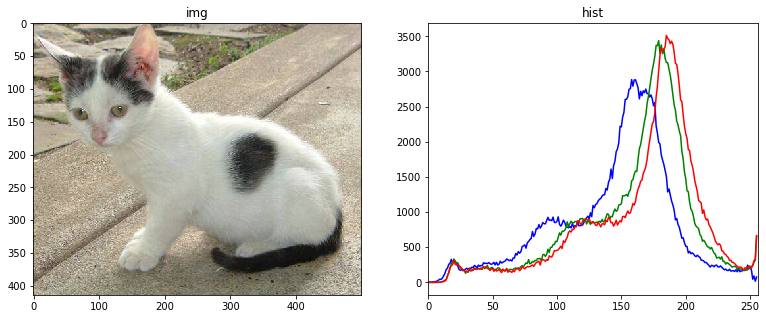

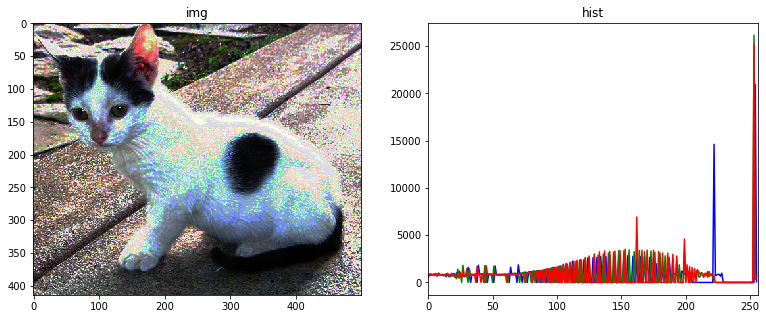

In [425]:
img = cv2.imread('cat.jpg')

#分几个阶段均衡化,根据自己的需求定。 分段越少，色阶越少。
grade = {}
num = 256    # 2~256
for i in range(1, num+1):
    grade[i] = np.int(256/(num/i))
    

    
#自定义 均衡化 方法
def bala_colorImg(img, grade):
    img_bala = img.copy()
    if (len(img.shape)==3) and (img.shape[2]==3):  #彩图
        for i in [0,1,2]: 
            for j,v in grade.items():
                xArr,yArr = np.where( img_bala[:,:,i] <= v )
                percent = len(xArr)/img_bala[:,:,i].size
                newValue = np.int( percent * 255 )
                if j>1:
                    xArr,yArr = np.where( (img_bala[:,:,i] > grade.get(j-1)) & (img_bala[:,:,i] <= v) )
                for pt in zip(xArr, yArr):  
                    img_bala[pt[0],pt[1],i] = newValue
    elif len(img.shape)==2:                        #灰度图
        for j,v in grade.items():
            xArr,yArr = np.where( img_bala <= v )
            percent = len(xArr)/img_bala.size
            newValue = np.int( percent * 255 )
            if j>1:
                xArr,yArr = np.where( (img_bala > grade.get(j-1)) & (img_bala <= v) )
            for pt in zip(xArr, yArr):  
                img_bala[pt[0],pt[1]] = newValue
    return img_bala




#画出原图和直方图
plotHist(img)

#均衡化
img_bala = bala_colorImg(img, grade)

#画出均衡后的图和直方图
plotHist(img_bala)


In [372]:
img_bala.dtype

dtype('uint8')

In [373]:
img_bala.shape

(414, 500, 3)


- **dst	=	cv.equalizeHist（	src [，dst]	）**<br>
    均衡灰度图像的直方图。
    

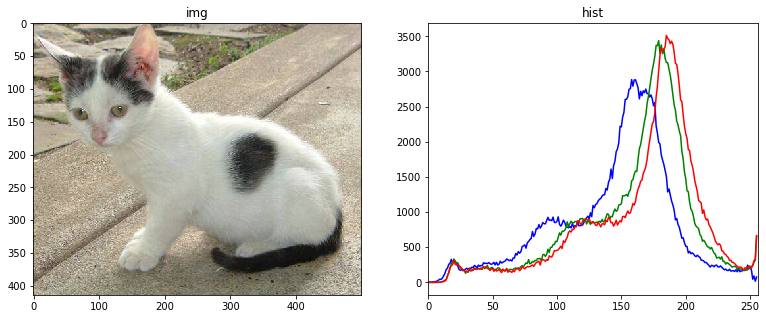

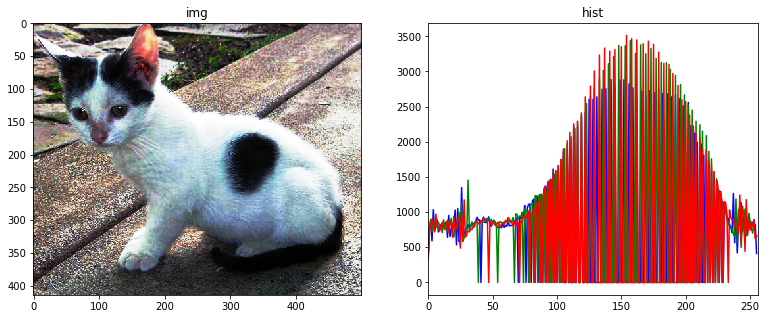

In [422]:
img = cv2.imread('cat.jpg')
plotHist(img)

b,g,r = cv2.split(img)

dst_b = cv2.equalizeHist( b )
dst_g = cv2.equalizeHist( g )
dst_r = cv2.equalizeHist( r )

dst = cv2.merge( (dst_b, dst_g, dst_r) )
plotHist(dst)

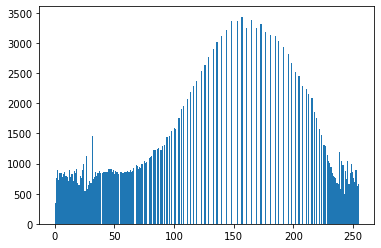

In [423]:
plt.hist(dst_g.ravel(), 256)
plt.show()

### 分小块进行均衡化
### 自适应直方图均衡化

- **retval	=	cv.createCLAHE(	[, clipLimit  [, tileGridSize]]	)**
    &nbsp;&nbsp;&nbsp;&nbsp;创建指向cv :: CLAHE类的智能指针并对其进行初始化。<br>
    
    - **clipLimit** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;	限制对比度的阈值。
    - **tileGridSize**	&nbsp;&nbsp;&nbsp;&nbsp; 直方图均衡化的网格大小。输入图像将被分成相等大小的矩形图块。tileGridSize定义行和列中的切片数。<br><br>
    
- **dst	=	cv.CLAHE.apply（	src   [，dst]	）**
    &nbsp;&nbsp;&nbsp;&nbsp;使用“对比度受限的自适应直方图均衡”均衡灰度图像的直方图。
    - **src**	&nbsp;&nbsp;&nbsp;&nbsp; 类型为CV_8UC1或CV_16UC1的源图像。

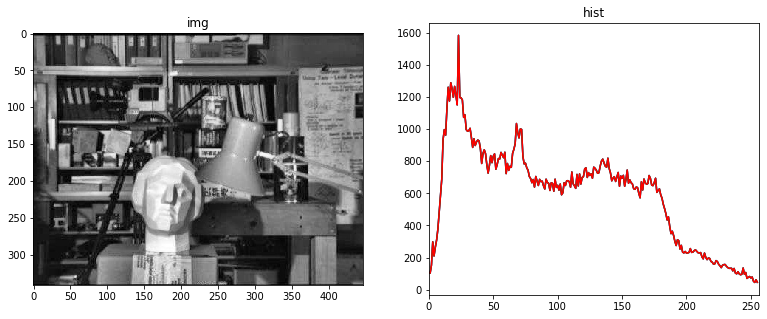

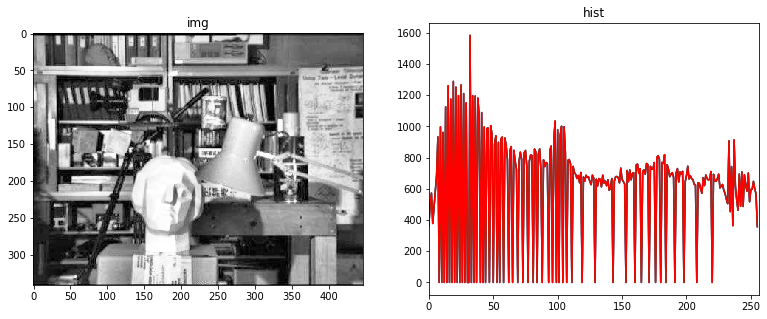

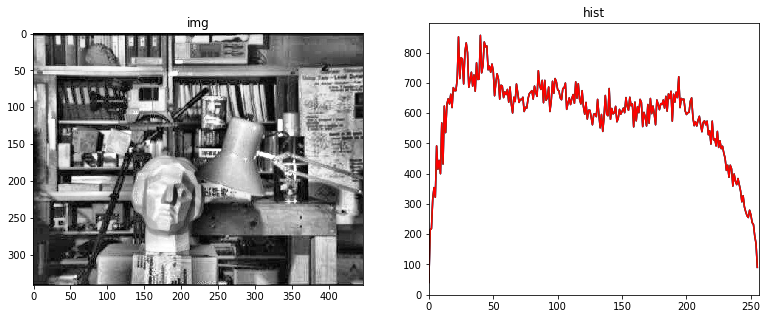

In [461]:
img = cv2.imread('clahe.jpg')
plotHist(img)

b,g,r = cv2.split(img)

#普通直方图均衡化
dst_b = cv2.equalizeHist( b )
dst_g = cv2.equalizeHist( g )
dst_r = cv2.equalizeHist( r )
dst = cv2.merge( (dst_b, dst_g, dst_r) )
plotHist(dst)

#自适应直方图均衡化
clahe = cv2.createCLAHE( clipLimit=2.0,  tileGridSize=(8,8) ) 
res_b = clahe.apply(b)
res_g = clahe.apply(g)
res_r = clahe.apply(r)
res = cv2.merge( (res_b, res_g, res_r) )
plotHist(res)